##faults data 를 가지고 학습 하기 

*   항목 추가
*   항목 추가



In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
faults = pd.read_csv('/content/faults_mini.csv')

faults.head()



,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0


In [ ]:
faults.describe()
'''
데이터의 대소 관계 가 너무 크면 한개의 독립변수 데이터 가 다른 독립 변수 데이터에 영향을 줄수 있음 

모든 변수의 최소 를 0 최대 를 1 로 맞춰줘서 하는데 
이떄 편향의 문제가 발생한다.
하나의 값이 편차가 있으면 나머지 값이 한쪽으로 편향되는 문제가 발생한다.
'''

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,336.800000,4.980733e+05,1102.300000,96.500000,0.400000,0.300000,0.300000
std,419.946769,3.014717e+05,1591.202973,53.750969,0.516398,0.483046,0.483046
min,42.000000,1.855750e+05,108.000000,40.000000,0.000000,0.000000,0.000000
25%,48.750000,2.948952e+05,133.750000,47.500000,0.000000,0.000000,0.000000
50%,132.000000,4.033820e+05,265.500000,75.000000,0.000000,0.000000,0.000000
75%,380.250000,5.998238e+05,1240.500000,150.000000,1.000000,0.750000,0.750000
max,1109.000000,1.170194e+06,4048.000000,175.000000,1.000000,1.000000,1.000000


In [ ]:
x_outlier = [100]
x = np.random.randint(0,7,size = 99) 

x = np.hstack([x,x_outlier]) #두개의 넘파이를 합치는 함수 

y = np.random.randint(0,40,size = 100)

print(x)
print(y)



[  6   3   4   5   2   1   0   6   6   3   4   3   2   1   6   4   0   4
   0   2   2   4   2   0   3   6   3   2   2   4   4   4   0   6   6   1
   3   4   5   3   2   0   5   5   1   0   2   5   2   4   0   5   2   5
   1   2   1   0   3   4   4   2   2   0   3   3   0   0   6   0   6   0
   2   1   2   1   0   1   1   4   2   2   4   1   2   4   0   2   5   0
   4   1   0   6   6   3   1   5   1 100]
[22 33 18 11  9 17 12 35 24 36  8  2  2 16 15 14 35 37 13  9  2 32 28  3
  0 36 23 12  7 14 25 21 16 23 14 15 15  5 28 38 21 30 37  5 26 24 39 17
  2 19  6 11 34 15 12 33 30  2 34 32 18 14  9  1 38 34 29 14  2  8 26  3
 26 21 26 39 23 36 16 21 11 33  2 26 39 29 18 26  7  6 19 36 30 17 18  4
  7 18 20 34]


In [ ]:
#정규화 코드 

x_nor = (x - x.min()) / (x.max() - x.min())
y_nor = (y - y.min()) / (y.max() - y.min())

print(x_nor)

print(y_nor)

'''
이상치 가 발생 했을떄 

이상치 제거 -> 따로 회귀를 하여 예측 
or 이상치를 근처의 값으로 바꿔준다.

'''


[0.06 0.03 0.04 0.05 0.02 0.01 0.   0.06 0.06 0.03 0.04 0.03 0.02 0.01
 0.06 0.04 0.   0.04 0.   0.02 0.02 0.04 0.02 0.   0.03 0.06 0.03 0.02
 0.02 0.04 0.04 0.04 0.   0.06 0.06 0.01 0.03 0.04 0.05 0.03 0.02 0.
 0.05 0.05 0.01 0.   0.02 0.05 0.02 0.04 0.   0.05 0.02 0.05 0.01 0.02
 0.01 0.   0.03 0.04 0.04 0.02 0.02 0.   0.03 0.03 0.   0.   0.06 0.
 0.06 0.   0.02 0.01 0.02 0.01 0.   0.01 0.01 0.04 0.02 0.02 0.04 0.01
 0.02 0.04 0.   0.02 0.05 0.   0.04 0.01 0.   0.06 0.06 0.03 0.01 0.05
 0.01 1.  ]
[0.56410256 0.84615385 0.46153846 0.28205128 0.23076923 0.43589744
 0.30769231 0.8974359  0.61538462 0.92307692 0.20512821 0.05128205
 0.05128205 0.41025641 0.38461538 0.35897436 0.8974359  0.94871795
 0.33333333 0.23076923 0.05128205 0.82051282 0.71794872 0.07692308
 0.         0.92307692 0.58974359 0.30769231 0.17948718 0.35897436
 0.64102564 0.53846154 0.41025641 0.58974359 0.35897436 0.38461538
 0.38461538 0.12820513 0.71794872 0.97435897 0.53846154 0.76923077
 0.94871795 0.12820513 0.6

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


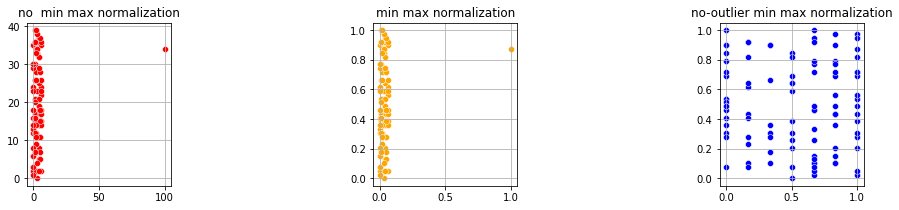

In [ ]:
#matplot 
plt.figure(figsize = (15,3))
plt.subplot(1,5,1)
sns.scatterplot(x,y,color = 'red')
plt.title("no  min max normalization")
plt.grid()

#정규화 한 그래프 

plt.subplot(1,5,3)
sns.scatterplot(x_nor,y_nor,color = 'orange')
plt.title('min max normalization')
plt.grid()


#이상치 없는 데이터  = 정규화 가 잘된 그래프 데이터를 잘보고 정규화 를 잘하고 데이터 분석을 꼼꼼히 해야 한다.
var_x = np.random.randint(0,7,size =100)
var_y = np.random.randint(0,40,size = 100)

norx = (var_x - var_x.min()) / (var_x.max() - var_x.min())
nory = (var_y - var_y.min()) / (var_y.max() - var_y.min())

plt.subplot(1,5,5)
sns.scatterplot(norx,nory,color = 'blue')
plt.title('no-outlier min max normalization')
plt.grid()

plt.show()


In [ ]:
faults_norm = (faults - faults.min()) / (faults.max() - faults.min())
faults_norm.head()

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,0.000000,0.086658,0.040355,0.296296,1.0,0.0,0.0
1,0.976570,0.000000,0.000000,0.000000,0.0,0.0,1.0
2,1.000000,1.000000,0.005584,1.000000,0.0,1.0,0.0
3,0.138707,0.025757,0.006091,0.814815,1.0,0.0,0.0
4,0.269916,0.247458,0.039594,0.814815,1.0,0.0,0.0


In [ ]:
faults_norm.describe()

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.276289,0.317380,0.252360,0.418519,0.400000,0.300000,0.300000
std,0.393577,0.306181,0.403859,0.398155,0.516398,0.483046,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006326,0.111028,0.006536,0.055556,0.000000,0.000000,0.000000
50%,0.084349,0.221209,0.039975,0.259259,0.000000,0.000000,0.000000
75%,0.317010,0.420720,0.287437,0.814815,1.000000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
faults_shuffle = faults_norm.sample(frac = 1) #데이터를 섞고 싶을 떄 쓰는 함수 1 = 100% 0 = 0%

print(faults_norm)
print('----------------------------------------------------------')
print(faults_shuffle)

   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
0   0.000000   0.086658      0.040355  ...     1.0        0.0       0.0
1   0.976570   0.000000      0.000000  ...     0.0        0.0       1.0
2   1.000000   1.000000      0.005584  ...     0.0        1.0       0.0
3   0.138707   0.025757      0.006091  ...     1.0        0.0       0.0
4   0.269916   0.247458      0.039594  ...     1.0        0.0       0.0
5   0.029991   0.602841      0.354822  ...     1.0        0.0       0.0
6   0.008435   0.406539      0.007868  ...     0.0        1.0       0.0
7   0.332709   0.425447      0.085279  ...     0.0        1.0       0.0
8   0.000937   0.184138      1.000000  ...     0.0        0.0       1.0
9   0.005623   0.194961      0.984010  ...     0.0        0.0       1.0

[10 rows x 7 columns]
----------------------------------------------------------
   X_Minimum  Y_Minimum  Pixels_Areas  ...  Pastry  Z_Scratch  K_Scatch
7   0.332709   0.425447      0.085279  ...     0.0    

In [ ]:
faults_np = faults_shuffle.to_numpy()
print(type(faults_np))



<class 'numpy.ndarray'>


In [ ]:
#train_test_split
train_ratio = 0.8
input_cnt = 4
output_cnt = 3

train_idx = int(len(faults_np) * train_ratio)
print(train_idx)



8


In [ ]:
#train test split and printing
train_x,train_y = faults_np[:train_idx,:-output_cnt] ,faults_np[:train_idx,-output_cnt:] 
test_x,test_y = faults_np[train_idx:,:-output_cnt] ,faults_np[train_idx:,-output_cnt:]

print(train_x.shape)
print('----------------------------------------------------------')
print(train_y.shape)
print('----------------------------------------------------------')
print(test_x.shape)
print('----------------------------------------------------------')
print(test_y.shape)

(8, 4)
----------------------------------------------------------
(8, 3)
----------------------------------------------------------
(2, 4)
----------------------------------------------------------
(2, 3)


In [ ]:
#신경망 업데이트 

epochs = 25
minibatch = 2
learning_rate = 0.001

'''
activation = softmax 분류 문제를 하기 위해 확률적 수치로 변경한다.
loss function = cross entropy 분류 문제를 할떄 사용한다.
optimizer= adam 학습 업데이트 최적화 방식
'''

simple_layer_model = tf.keras.Sequential([
                        tf.keras.layers.Dense(units = 3 ,
                                              activation = 'softmax',
                                              input_shape = (4,))

])

simple_layer_model.summary()

'''
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 3)                 15        
=================================================================
Total params: 15
Trainable params: 15 학습 시키기 가능한 변구 
Non-trainable params: 0  학습을 시키지 않는 파라미터 
_________________________________________________________________

구글 아마존 이 만든 신경망을 가져올떄 
각 회사별로 신경망을 구축 한것이다.
나한테 맞는 문제로 바꿀 떄 갖고 온 신경망 계층에 몇개만 만들면 된다.
'''
simple_layer_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss = 'categorical_crossentropy')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#학습 결과 반환
history = simple_layer_model.fit(train_x,train_y,epochs = 25,batch_size=2)


Epoch 1/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9844
Epoch 2/25
4/4 [==============================] - 0s 2ms/step - loss: 0.9821
Epoch 3/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9802
Epoch 4/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9783
Epoch 5/25
4/4 [==============================] - 0s 2ms/step - loss: 0.9767
Epoch 6/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9747
Epoch 7/25
4/4 [==============================] - 0s 4ms/step - loss: 0.9730
Epoch 8/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9711
Epoch 9/25
4/4 [==============================] - 0s 2ms/step - loss: 0.9689
Epoch 10/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9675
Epoch 11/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9655
Epoch 12/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9641
Epoch 13/25
4/4 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
#test data 평가 
simple_layer_model.evaluate(test_x,test_y)

1/1 [==============================] - 0s 17ms/step - loss: 1.9028


1.9027680158615112

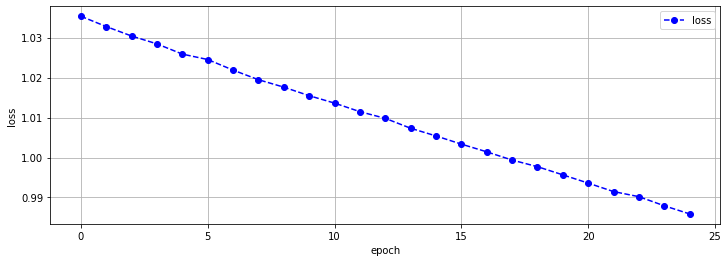

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(history.history['loss'],'b--o',label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#test data 로 예측 하기 
predict_y = simple_layer_model.predict(test_x)
print(predict_y)
print('---------------------------------------------')
print(test_y)
'''
[[0.1833083  0.08357719 0.73311454] 실제 정답 2
 [0.26618835 0.16605066 0.567761  ]] 실제 정답 2
---------------------------------------------
[[0. 1. 0.] 실제 정답 2
 [1. 0. 0.]] 실제 정답 0
 '''

pred_y = np.argmax(predict_y,axis = 1)
print(pred_y)

[[0.2153937  0.09666132 0.68794495]
 [0.29796678 0.17406258 0.5279707 ]]
---------------------------------------------
[[0. 1. 0.]
 [1. 0. 0.]]
[2 2]


In [ ]:
tes_y = np.argmax(test_y,axis = 1)
print(tes_y)

[1 0]


In [ ]:
#결과 비교 and 정확도 측정
acc = np.mean(np.equal(pred_y,tes_y)) 
print(acc * 100) 

0.0
